In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
data_names = np.array(["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])
data = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None, names = data_names, na_values='?')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

<AxesSubplot:>

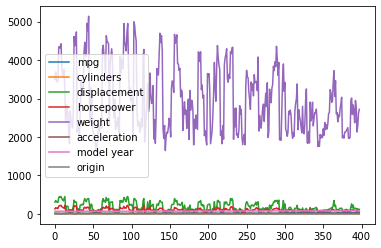

In [5]:
data.plot()

<AxesSubplot:ylabel='Frequency'>

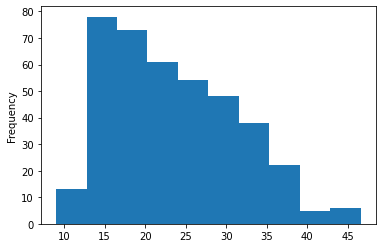

In [6]:
data['mpg'].plot.hist()

In [7]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

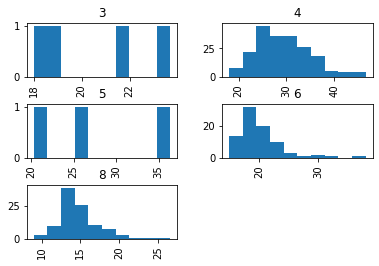

In [11]:
axs = data.hist(column='mpg', by='cylinders')

[Text(0.5, 1.0, '7 cylinder'), (0.0, 50.0)]

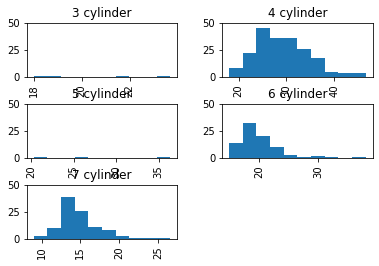

In [25]:
axs = data.hist(column='mpg', by='cylinders')
axs[0, 0].set(title='3 cylinder', ylim=[0, 50])
axs[0, 1].set(title='4 cylinder', ylim=[0, 50])
axs[1, 0].set(title='5 cylinder', ylim=[0, 50])
axs[1, 1].set(title='6 cylinder', ylim=[0, 50])
axs[2, 0].set(title='7 cylinder', ylim=[0, 50])

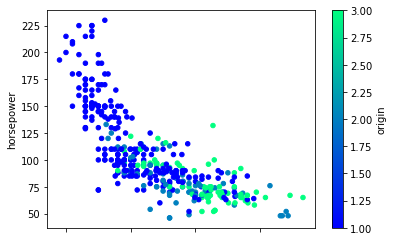

In [26]:
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='winter')

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

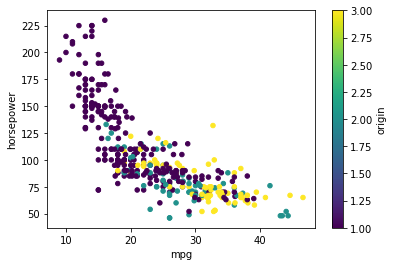

In [27]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='viridis', ax=ax)

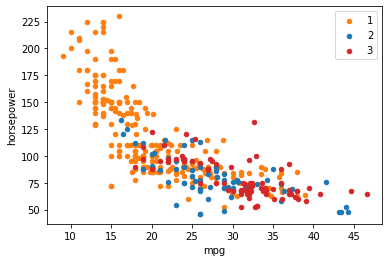

In [46]:
colors = {1: 'tab:orange', 2: 'tab:blue', 3: 'tab:red'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'horsepower', c=colors[key], label=key, ax=ax)

In [48]:
import seaborn as sns

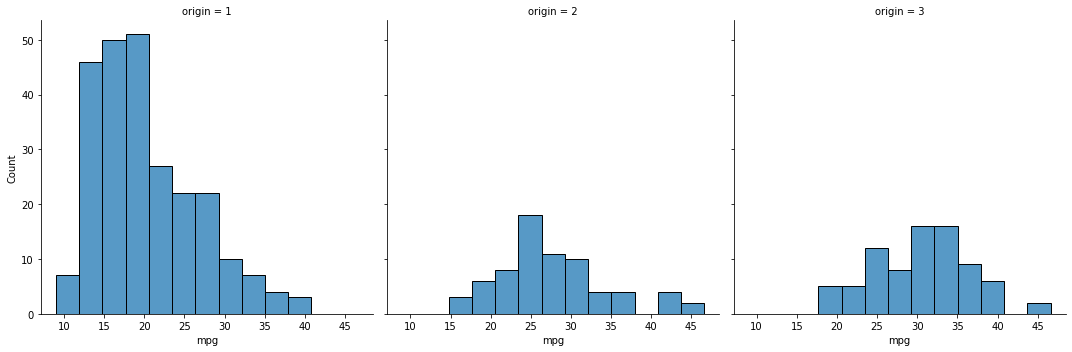

In [49]:
# Use gender to split age into columns
sns.displot(x='mpg', col='origin', data=data)

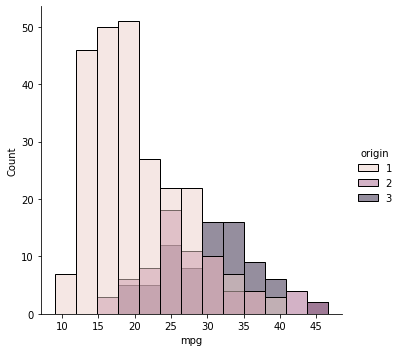

In [50]:
sns.displot(x='mpg', hue='origin', data=data)

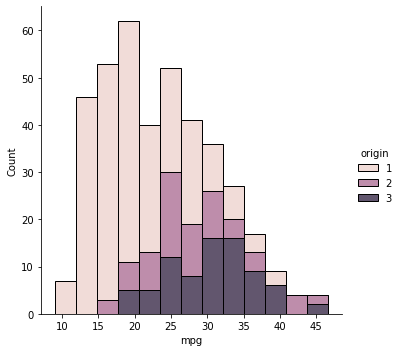

In [52]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack')

<AxesSubplot:xlabel='origin', ylabel='mpg'>

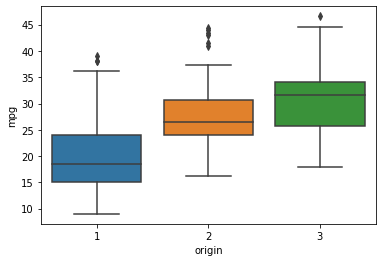

In [53]:
sns.boxplot(x='origin', y='mpg', data=data)

In [54]:
data['origin_str'] = data['origin'].replace([1,2,3], ['Place1', 'Place2', 'Place3'])

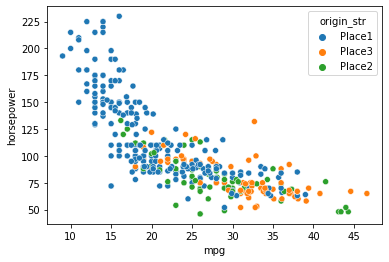

In [55]:
ax = sns.scatterplot(x='mpg', y='horsepower', data=data, hue='origin_str')

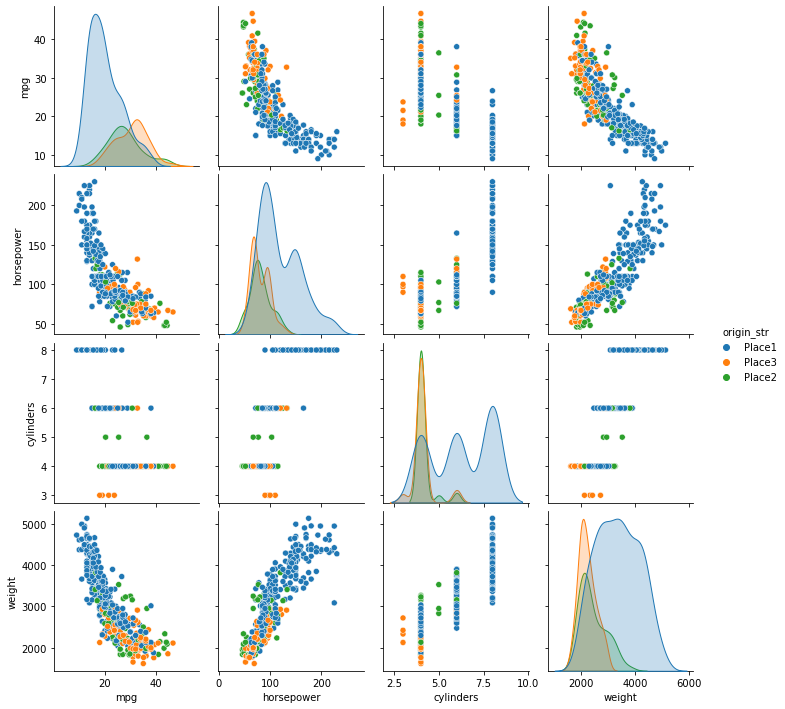

In [56]:
sns.pairplot(data, vars=['mpg', 'horsepower', 'cylinders', 'weight'], hue='origin_str')

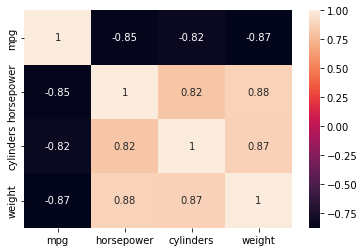

In [57]:
g = sns.heatmap(data[['mpg', 'horsepower', 'cylinders', 'weight']].corr(method='spearman'), 
            annot=True)